# Планирование рекламных кампаний в игровой индустрии для интернет-магазина «Стримчик»

# Описание данных
-	Name — название игры
-	Platform — платформа
-	Year_of_Release — год выпуска
-	Genre — жанр игры
-	NA_sales — продажи в Северной Америке (миллионы проданных копий)
-	EU_sales — продажи в Европе (миллионы проданных копий)
-	JP_sales — продажи в Японии (миллионы проданных копий)
-	Other_sales — продажи в других странах (миллионы проданных копий)
-	Critic_Score — оценка критиков (максимум 100)
-	User_Score — оценка пользователей (максимум 10)
-	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st


In [2]:
games = pd.read_csv('/datasets/games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
games.duplicated().sum()

0

Явных дубликатов не обнаружено.

In [4]:
games.columns = games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
games['user_score'] = games['user_score'].replace('tbd',np.nan,regex=True)
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [8]:
games.dropna(subset=['year_of_release','genre','name'],inplace=True)

In [9]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [10]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [11]:
games['year_of_release'] = games['year_of_release'].astype('int')
games['user_score'] = games['user_score'].astype('float')
games['rating'] = games['rating'].fillna('No_rating')

 В столбце user_score 'tbd' перевести nan,пропуски в name,genre,year_of_release удалены.

In [12]:
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [13]:
games.sort_values('sum_sales',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16183,Uta no * Prince-Sama: Sweet Serenade,PSP,2011,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01
16184,Higurashi no Naku Koro ni Iki,PS3,2015,Action,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,NaN,NaN,No_rating,0.00


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

In [15]:
pivot_table_games_year = games.pivot_table(index = 'year_of_release',values = 'name', aggfunc = 'count')
pivot_table_games_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


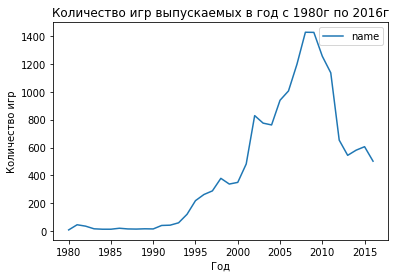

In [16]:
pivot_table_games_year.plot();
plt.title('Количество игр выпускаемых в год с 1980г по 2016г')
plt.xlabel('Год');
plt.ylabel('Количество игр');

Количество компьютерных игр было на пике в 2009 году.После этого игр стало выпускаться меньше.

### Платформы с наибольшими суммарными продажами

In [17]:
pivot_table_sum_sales_platform = games.pivot_table(index = 'platform',values = 'sum_sales',aggfunc = 'sum')
pivot_table_sum_sales_platform = pivot_table_sum_sales_platform.sort_values('sum_sales',ascending = False)
pivot_table_sum_sales_platform 

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [18]:
top_platform = ['PS2','PS3','X360','DS','Wii','PC']

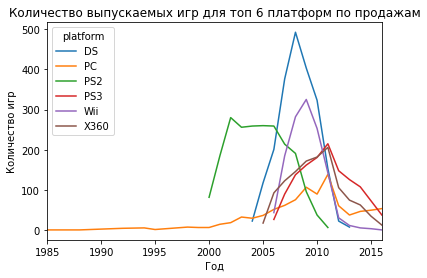

In [19]:
top_platform_pivot_table = games.query('platform in @top_platform').pivot_table(index ='year_of_release',columns = 'platform',values = 'name',aggfunc = 'count' )
top_platform_pivot_table.plot();
plt.xlim([1985, 2016]);
plt.title('Количество выпускаемых игр для топ 6 платформ по продажам');
plt.xlabel('Год');
plt.ylabel('Количество игр');

В среднем платформа живет около 10 лет,кроме платформы "PC".Пик  примерно по середине,с учетом этого можно выбрать период от 2012 ,и посмотреть на платформы ,которые идут в рост по количеству игр или по продажам.

### Актуальный период

In [20]:
actual_period = games[games['year_of_release'] > 2011]
actual_period


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,No_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01


### Поиск потенциально прибыльных платформ

In [21]:
actual_period.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sum_sales, dtype: float64

In [22]:
actual_period.groupby('platform')['name'].count().sort_values(ascending=False)

platform
PS3     493
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: name, dtype: int64

In [23]:
top_sales_platform = ['PS4','PS3','X360','3DS','XOne','WiiU','PC','PSV','Wii']


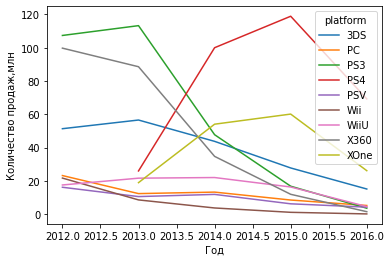

In [24]:
actual_sales = actual_period.query('platform in @top_sales_platform').pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum')
actual_sales.plot();
plt.xlabel('Год');
plt.ylabel('Количество продаж,млн');

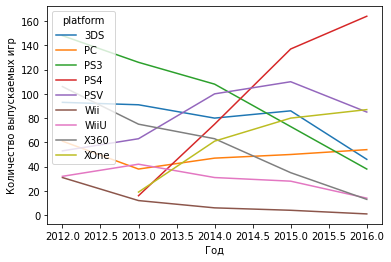

In [25]:
actual_count = actual_period.query('platform in @top_sales_platform').pivot_table(index='year_of_release', columns = 'platform', values='name', aggfunc='count')
actual_count.plot();
plt.xlabel('Год');
plt.ylabel('Количество выпускаемых игр');

### Диаграмма размаха  по глобальным продажам игр в разбивке по платформам

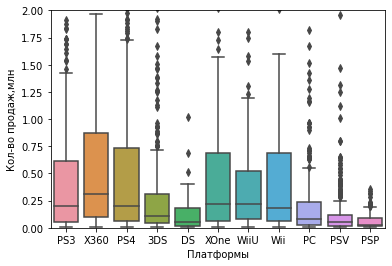

In [26]:
sns.boxplot(data =actual_period,x='platform',y='sum_sales');
plt.xlabel('Платформы');
plt.ylabel('Кол-во продаж,млн');
plt.ylim([0,2]);


Можно выделить 6 платформ, у которых медианные продажи игры около 200 тысяч проданных копий.Количетсво выпущенных игр на платформы  'Wii','Wiiu','X360' сильно снижается на протяжении нескольких лет и близко к нулю.
PS3,3DS,PSV количество выпускаемых игр снижается,но не так сильно как у 'Wii','Wiiu','X360'.
PC,PS4,XOne количество выпускаемых игр растет.
К перспективным платформам можно отнестии PS4,XOne.



In [27]:
perspective = ['PS4','XOne']

In [28]:
perspective_platform = actual_period.query('platform in @perspective')


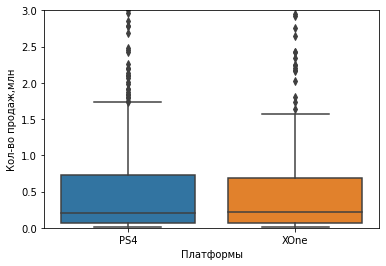

In [29]:
sns.boxplot(data =perspective_platform,x='platform',y='sum_sales');
plt.xlabel('Платформы');
plt.ylabel('Кол-во продаж,млн');
plt.ylim([0,3]);


Медиана платформ PS4 и Xone находится на уровне 200 тысяч проданных копий игры.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Корреляция оценок пользователей и продаж: -0.031957110204556424
Корреляция оценок критиков и продаж: 0.4065679020617816


Text(0.5, 1.0, 'ps4_critic_score')

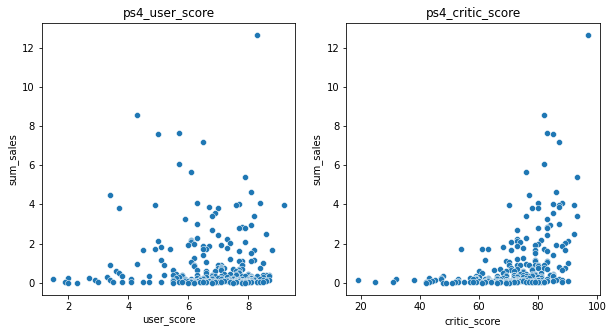

In [30]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
ps4 = actual_period[actual_period['platform']== 'PS4']
print('Корреляция оценок пользователей и продаж:',ps4['user_score'].corr(ps4['sum_sales']))
sns.scatterplot(x = 'user_score',y = 'sum_sales',data=ps4);
plt.title('ps4_user_score')

plt.subplot(1, 2, 2)
ps4 = actual_period[actual_period['platform']== 'PS4']
print('Корреляция оценок критиков и продаж:',ps4['critic_score'].corr(ps4['sum_sales']))
sns.scatterplot(x = 'critic_score',y = 'sum_sales',data=ps4);
plt.title('ps4_critic_score')


Чем выше оценки критиков,тем чаще игры приносили высокую прибыль.Корреляция между оценками критиков и продажами,выше чем корреляция между пользовательскими оценка и продажами

Корреляция оценок пользователей и продаж: -0.004339437514314869
Корреляция оценок критиков и продаж: 0.0944878992931617


Text(0.5, 1.0, 'psv_critic_score')

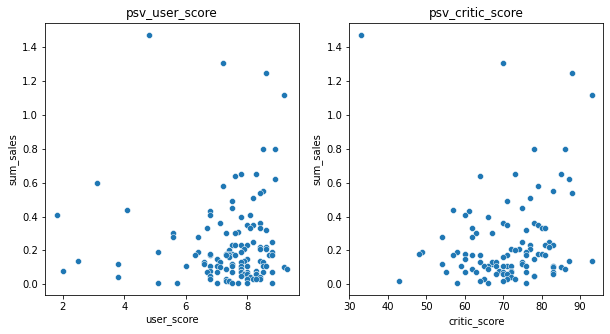

In [31]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
psv = actual_period[actual_period['platform']== 'PSV']
print('Корреляция оценок пользователей и продаж:',psv['user_score'].corr(psv['sum_sales']))
sns.scatterplot(x = 'user_score',y = 'sum_sales',data=psv);
plt.title('psv_user_score')

plt.subplot(1, 2, 2)
psv = actual_period[actual_period['platform']== 'PSV']
print('Корреляция оценок критиков и продаж:',psv['critic_score'].corr(psv['sum_sales']))
sns.scatterplot(x = 'critic_score',y = 'sum_sales',data=psv);
plt.title('psv_critic_score')


Пользовательские оценки чаще всего высокие.

Корреляция оценок пользователей и продаж: -0.12186747630735582
Корреляция оценок критиков и продаж: 0.23724324311567926


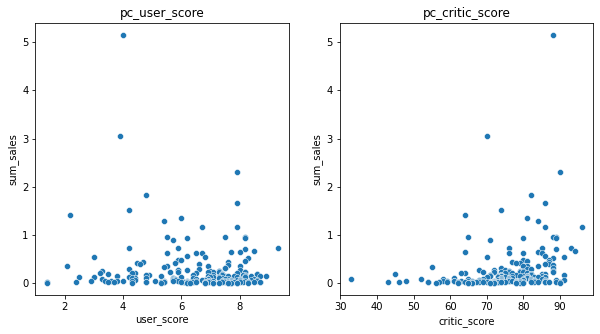

In [32]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
pc = actual_period[actual_period['platform']== 'PC']
print('Корреляция оценок пользователей и продаж:',pc['user_score'].corr(pc['sum_sales']))
sns.scatterplot(x = 'user_score',y = 'sum_sales',data=pc);
plt.title('pc_user_score');

plt.subplot(1, 2, 2)
pc = actual_period[actual_period['platform']== 'PC']
print('Корреляция оценок критиков и продаж:',pc['critic_score'].corr(pc['sum_sales']))
sns.scatterplot(x = 'critic_score',y = 'sum_sales',data=pc);
plt.title('pc_critic_score');

Корреляция оценок пользователей и продаж: -0.06892505328279416
Корреляция оценок критиков и продаж: 0.4169983280084017


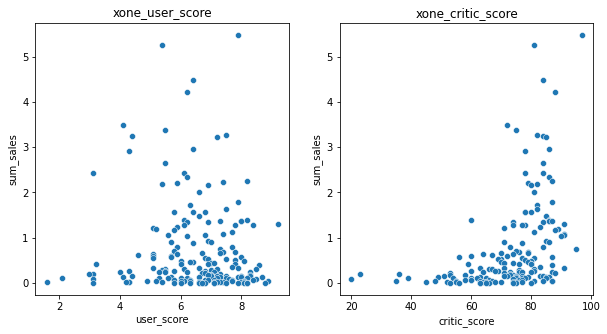

In [33]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
xone = actual_period[actual_period['platform']== 'XOne']
print('Корреляция оценок пользователей и продаж:',xone['user_score'].corr(xone['sum_sales']))
sns.scatterplot(x = 'user_score',y = 'sum_sales',data=xone);
plt.title('xone_user_score');

plt.subplot(1, 2, 2)
xone = actual_period[actual_period['platform']== 'XOne']
print('Корреляция оценок критиков и продаж:',xone['critic_score'].corr(xone['sum_sales']))
sns.scatterplot(x = 'critic_score',y = 'sum_sales',data=xone);
plt.title('xone_critic_score');

Чем выше оценки критиков,тем чаще игры имели хорошие продажи. Оценка пользователей меньше влияет на продажи,по сравнению с оценками критиков.

Оценки пользователей и продаж имеют очень слабую корреляцию.
Оценки критиков на платформах PS4  и XOne имеют слабую корреляцию,в отличие от PC и PSV.
В целом оценки пользователей и критиков имеют слабое влияние на продажи

### Общее распределение игр по жанрам

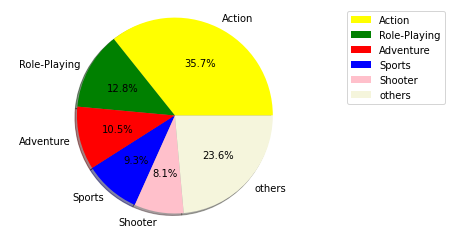

In [34]:
genre = actual_period.groupby('genre')['sum_sales'].count().sort_values(ascending=False).reset_index()
others = genre.iloc[5:]['sum_sales'].sum()
genre_df = genre.iloc[:5]
df = pd.DataFrame([['others',others]],columns=['genre','sum_sales'])
df2 = genre_df.append(df,ignore_index=True)

labels = df2['genre']
values = df2['sum_sales']
colors = ['yellow','green','red','blue','pink','beige']
plt.pie(values,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='upper left',bbox_to_anchor=(1.0,1.0))
plt.show()

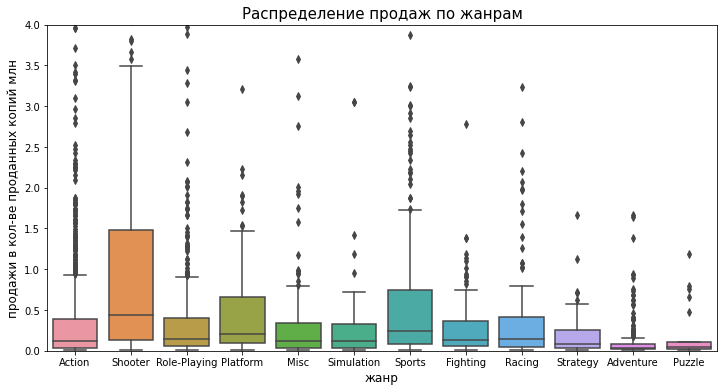

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(data =actual_period,x='genre',y='sum_sales');
plt.title('Распределение продаж по жанрам', fontsize=15)
plt.xlabel('жанр', fontsize=12)
plt.ylabel('продажи в кол-ве проданных копий млн',fontsize=12)
plt.ylim([0,4]);
plt.show()



In [36]:
medina_genre = actual_period.pivot_table(index='genre',values='sum_sales',aggfunc='median').sort_values('sum_sales',ascending=False)
medina_genre

,sum_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


Топ 5 прибыльных жанров.
Shooter- 440 000 проданных копий
Sports- 240 000 проданных копий
Platform - 210 000 проданных копий
Role-Playing - 140 000 проданных копий
Racing	- 140 000 проданных копий

Три жанра с самыми низкими продажами Strategy,Puzzle,Adventure	
Больше всего игр выходит жанра Action

## Портрет пользователя каждого региона  (NA, EU, JP):

### Самые популярные платформы (топ-5) различия в долях продаж

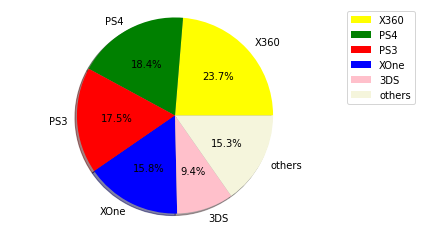

In [37]:
na_platform = actual_period.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values('na_sales',ascending=False).reset_index()
others = na_platform.iloc[5:]['na_sales'].sum()
platform = na_platform.iloc[:5]
df = pd.DataFrame([['others',others]], columns = ['platform','na_sales'])
df2 = platform.append(df,ignore_index=True)

labels = df2['platform']
values = df2['na_sales']
colors = ['yellow','green','red','blue','pink','beige']
plt.pie(values,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()



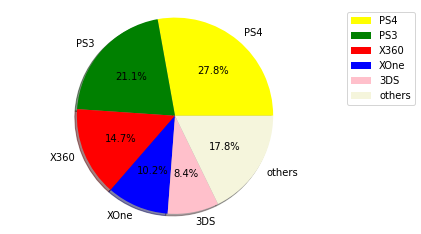

In [38]:
eu_platform = actual_period.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values('eu_sales',ascending=False).reset_index()
others = eu_platform.iloc[5:]['eu_sales'].sum()
platform = eu_platform.iloc[:5]
df = pd.DataFrame([['others',others]], columns = ['platform','eu_sales'])
df2 = platform.append(df,ignore_index=True)

labels = df2['platform']
values = df2['eu_sales']
colors = ['yellow','green','red','blue','pink','beige']
plt.pie(values,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()



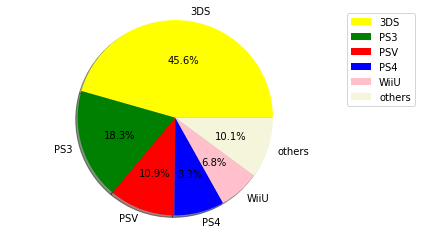

In [39]:
jp_platform = actual_period.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values('jp_sales',ascending=False).reset_index()
others = jp_platform.iloc[5:]['jp_sales'].sum()
platform = jp_platform.iloc[:5]
df = pd.DataFrame([['others',others]], columns = ['platform','jp_sales'])
df2 = platform.append(df,ignore_index=True)

labels = df2['platform']
values = df2['jp_sales']
colors = ['yellow','green','red','blue','pink','beige']
plt.pie(values,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

В Северной Америке почти 85% продаж приходится на платформы X360-23,7% ,PS4-18,4%, PS3-17,5%, XOne-15,8%,DS-9,4%
В Европе ситуация схожа, 82% продаж приходится на эти же платформы. PS4-27,8%,PS3-21,1%,X360-14,7%,XOne-10,2%,DS-8,4%
В Японии платформы X360,XOne не входят в топ5,а платформа 3DS?которая в NA и EU занимает от 8,4 до 9,4% рынка, в Японии занимает большую часть рынка (45,6%),PS3-18,3%,PSV-10.9%,PS4-8.3%,Wiiu-6.8%

### Самые популярные жанры (топ-5).

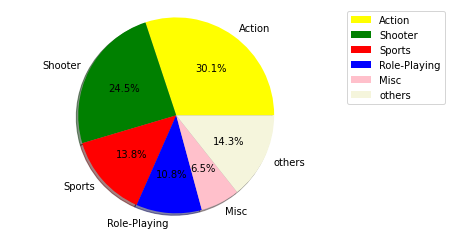

In [40]:
na_genre = actual_period.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values('na_sales',ascending=False).reset_index()
others = na_genre.iloc[5:]['na_sales'].sum()
platform = na_genre.iloc[:5]
df = pd.DataFrame([['others',others]], columns = ['genre','na_sales'])
df2 = platform.append(df,ignore_index=True)

labels = df2['genre']
values = df2['na_sales']
colors = ['yellow','green','red','blue','pink','beige']
plt.pie(values,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()



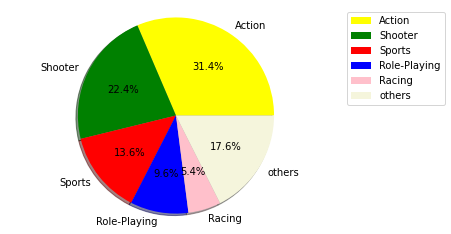

In [41]:
eu_genre = actual_period.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values('eu_sales',ascending=False).reset_index()
others = eu_genre.iloc[5:]['eu_sales'].sum()
platform = eu_genre.iloc[:5]
df = pd.DataFrame([['others',others]], columns = ['genre','eu_sales'])
df2 = platform.append(df,ignore_index=True)

labels = df2['genre']
values = df2['eu_sales']
colors = ['yellow','green','red','blue','pink','beige']
plt.pie(values,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

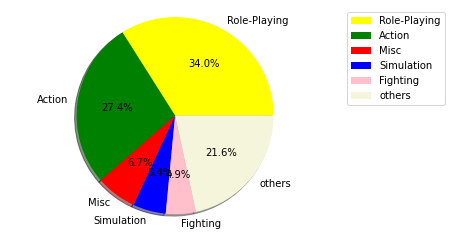

In [42]:
jp_genre = actual_period.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values('jp_sales',ascending=False).reset_index()
others = jp_genre.iloc[5:]['jp_sales'].sum()
platform = jp_genre.iloc[:5]
df = pd.DataFrame([['others',others]], columns = ['genre','jp_sales'])
df2 = platform.append(df,ignore_index=True)

labels = df2['genre']
values = df2['jp_sales']
colors = ['yellow','green','red','blue','pink','beige']
plt.pie(values,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

В Северной Америке в топ 5 жанров входят, Action-30.1%,Shooter-24.5%,Sports-13.8%,Role-Playing - 10.8%,Misc-6.5%
В Европе топ 5 жанров:Action-31.1%,Shooter-22.5%,Sports-13.6%,Role-Playing - 9.6%,Racing-5.4%
4 жанра из 5 повторяются,и имеют схожее распределение процентов по продажам. 
В Японии предпочтение жанров отличается,от двух других регионов.Самый продаваемый жанр Role-Playing - 34%,в NA и EU он занимал 4 место , и имел около 10%.
Action-27.4% ,имеет так же хорошую популярность. Misc -6.7%,Simulation-5.4%,Fighting-4.9%/


### Влияние рейтингa ESRB на продажи в отдельном регионе

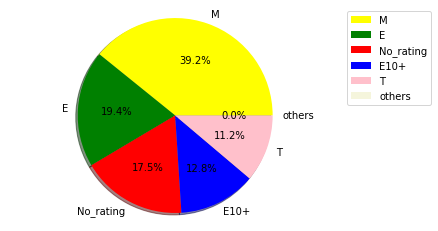

In [43]:
na_rating = actual_period.pivot_table(index='rating',values='na_sales',aggfunc='sum').sort_values('na_sales',ascending=False).reset_index()
others = na_rating.iloc[5:]['na_sales'].sum()
platform = na_rating.iloc[:5]
df = pd.DataFrame([['others',others]], columns = ['rating','na_sales'])
df2 = platform.append(df,ignore_index=True)

labels = df2['rating']
values = df2['na_sales']
colors = ['yellow','green','red','blue','pink','beige']
plt.pie(values,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

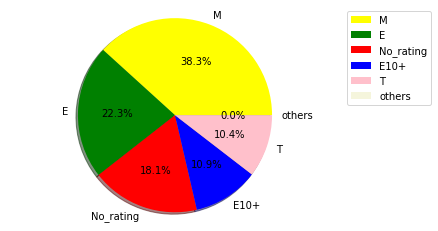

In [44]:
eu_rating = actual_period.pivot_table(index='rating',values='eu_sales',aggfunc='sum').sort_values('eu_sales',ascending=False).reset_index()
others = eu_rating.iloc[5:]['eu_sales'].sum()
platform = eu_rating.iloc[:5]
df = pd.DataFrame([['others',others]], columns = ['rating','eu_sales'])
df2 = platform.append(df,ignore_index=True)

labels = df2['rating']
values = df2['eu_sales']
colors = ['yellow','green','red','blue','pink','beige']
plt.pie(values,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

В Северной Америке и Европе ,схоже распределение рейтинга ESRB.Большую часть занимает категория "М"(для взрослых) 38,3-39,3%,категория "Е" занимает 19,4 -22,3%
Игры без рейтинга 17,5- 18,1%,так как показатель довольно высокий,можно предположить рейтинг не влияют на продажи.
В Северной Америке и Европе предпочтения по играм очень близки.

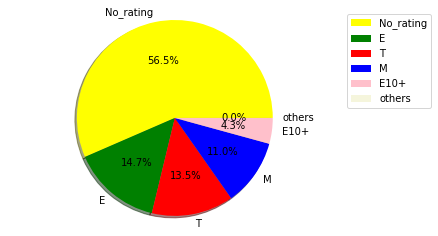

In [45]:
jp_rating = actual_period.pivot_table(index='rating',values='jp_sales',aggfunc='sum').sort_values('jp_sales',ascending=False).reset_index()
others = jp_rating.iloc[5:]['jp_sales'].sum()
platform = jp_rating.iloc[:5]
df = pd.DataFrame([['others',others]], columns = ['rating','jp_sales'])
df2 = platform.append(df,ignore_index=True)

labels = df2['rating']
values = df2['jp_sales']
colors = ['yellow','green','red','blue','pink','beige']
plt.pie(values,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

Игры без рейтинга занимают 56%,что в 3 раза больше чем в Европе или Северной Америке.Рейтинг ESBP в Японии не влияет на продажи

Самые популярные платформы в Японии компаний Nintendo и PlayStation,при этом Xbox нет в топ10 по продажам,это связано с тем что Nintendo и PlayStation японские компании. Можно предположить ,что эти компании лучше понимают своих покупателей ,а так же возможен патриотизм граждан.


In [47]:
na=actual_period['na_sales'].sum()
print('Количество проданых игр в Северной Америке',na)
eu=actual_period['eu_sales'].sum()
print('Количество проданых игр в Европе',eu)
jp=actual_period['jp_sales'].sum()
print('Количество проданых игр в Японии',jp)

Количество проданых игр в Северной Америке 590.97
Количество проданых игр в Европе 506.82000000000005
Количество проданых игр в Японии 192.58


## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


In [48]:
games['user_score'] = games['user_score'].dropna().astype('int')

In [49]:
ttest_xone = games.query('platform == "XOne" and user_score > 0')['user_score']
ttest_pc = games.query('platform == "PC" and user_score > 0')['user_score']


In [50]:
xone_var = np.var(ttest_xone )
xone_var

1.856056031880208

In [51]:
pc_var = np.var(ttest_pc)
pc_var                 

2.43437393096794

H0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1:Средние пользовательские рейтинги платформ Xbox One и PC разные

In [52]:
alpha = .05

results = st.ttest_ind(ttest_xone,ttest_pc,equal_var = False)

print('р-значение:',results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Средние оценки платформы "XOne":',ttest_xone.mean())
print('Средние оценки платформы "PC":',ttest_pc.mean())

р-значение: 2.4073039894750292e-05
Отвергаем нулевую гипотезу
Средние оценки платформы "XOne": 6.1098901098901095
Средние оценки платформы "PC": 6.60794701986755


Можно сделать вывод что средние пользовательские рейтинги платформ Xone и PC разные,так как вероятность что они одинаковые близка к 0


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H1: Средние пользовательские рейтинги жанров Action и Sports разные.    

In [53]:
action = games.query('genre == "Action" and user_score > 0')['user_score']
sports = games.query('genre == "Sports" and user_score > 0')['user_score']


In [54]:
action_var = np.var(action)
action_var

2.048700429077987

In [55]:
sports_var = np.var(sports)
sports_var

2.5244784370148805

In [56]:
alpha = .05

results = st.ttest_ind(action,sports,equal_var=False)

print('p-значение',results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Средние оценки платформы "Action":',action.mean())
print('Средние оценки платформы "Sports":',sports.mean())


p-значение 0.055351601583131446
Не получилось отвергнуть нулевую гипотезу
Средние оценки платформы "Action": 6.623398328690808
Средние оценки платформы "Sports": 6.510204081632653


Исходя из ттестов можно сделать вывод,что средние пользовательские оценки между жанрами одинаковые в 8% случаев,что превышает порог отвегания гипотезы

## Общий вывод

PS4 и XOne перспективные платформы для Европы или Северной Америки
предпочтительный жанр - Shooter 
рейтинг ESRB -"М"
Регион - Северная Америка,там продано больше всего количество игр.
Отзывы пользоватей и критиков,слабо влияют на продажи,их можно не учитывать.